In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sb
import yfinance as yf
import datetime as d
import streamlit as st

In [195]:
s = d.datetime(2020,4,1)
e = d.datetime(2025,3,31)

In [197]:
tcs=yf.download('TCS.NS',start=s,end=e)
hcl =yf.download('HCLTECH.NS',start=s,end=e)
wipro = yf.download('WIPRO.NS',start=s,end=e)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [198]:
tcs

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
Date,,,,,
2020-04-01,1575.169922,1691.319979,1568.947597,1683.161843,4941878
2020-04-03,1524.884521,1603.977237,1521.012897,1603.977237,5735369
2020-04-07,1636.425293,1646.242761,1571.713160,1576.322289,5427577
2020-04-08,1572.127930,1664.817569,1568.025849,1622.413577,6285615
2020-04-09,1628.082764,1639.743883,1595.864882,1613.610030,5307397
...,...,...,...,...,...
2025-03-24,3628.949951,3649.750000,3566.600098,3600.000000,1834751
2025-03-25,3657.750000,3710.000000,3638.000000,3645.000000,3135390


In [201]:
tcs.columns = tcs.columns.get_level_values(0)
wipro.columns = wipro.columns.get_level_values(0)
hcl.columns = hcl.columns.get_level_values(0)

In [203]:
#Combine all columns into a single DataFrame
combined_df = pd.concat(
    [tcs.add_prefix("TCS_"), hcl.add_prefix("HCL_"), wipro.add_prefix("Wipro_")], 
    axis=1
)

In [205]:
combined_df



Price,TCS_Close,TCS_High,TCS_Low,TCS_Open,TCS_Volume,HCL_Close,HCL_High,HCL_Low,HCL_Open,HCL_Volume,Wipro_Close,Wipro_High,Wipro_Low,Wipro_Open,Wipro_Volume
Date,,,,,,,,,,,,,,,
2020-04-01,1575.169922,1691.319979,1568.947597,1683.161843,4941878,348.358643,364.911069,343.852028,364.742587,8136746,90.930519,93.905553,89.730908,93.905553,9875668
2020-04-03,1524.884521,1603.977237,1521.012897,1603.977237,5735369,341.830353,361.036214,336.355002,352.865296,8166356,86.371994,90.978503,85.292344,90.210749,13147474
2020-04-07,1636.425293,1646.242761,1571.713160,1576.322289,5427577,380.031403,385.759476,358.003654,358.003654,5972948,92.082130,92.466007,87.835512,90.330701,9562862
2020-04-08,1572.127930,1664.817569,1568.025849,1622.413577,6285615,390.097717,401.638057,378.220412,379.905135,7991061,92.561974,95.968871,90.594616,91.890194,10275308
2020-04-09,1628.082764,1639.743883,1595.864882,1613.610030,5307397,395.109711,405.175942,389.171072,404.923244,5069225,94.385384,97.384411,93.593643,95.201118,6930346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,3628.949951,3649.750000,3566.600098,3600.000000,1834751,1604.150024,1610.900024,1560.000000,1591.000000,2487843,269.399994,271.649994,265.399994,267.049988,9269617
2025-03-25,3657.750000,3710.000000,3638.000000,3645.000000,3135390,1624.900024,1658.949951,1618.949951,1622.000000,4906013,271.000000,274.700012,269.350006,272.000000,12563930
2025-03-26,3635.800049,3680.500000,3625.850098,3647.750000,1734499,1633.400024,1644.949951,1622.000000,1624.900024,3096513,267.399994,272.250000,266.750000,272.000000,7308412


In [222]:
# Calculate Price Range (High - Low)
combined_df['TCS_Price_Range'] = combined_df['TCS_High'] - combined_df['TCS_Low']
combined_df['HCL_Price_Range'] = combined_df['HCL_High'] - combined_df['HCL_Low']
combined_df['Wipro_Price_Range'] = combined_df['Wipro_High'] - combined_df['Wipro_Low']

# Calculate Average Price
combined_df['TCS_Avg_Price'] = (combined_df['TCS_High'] + combined_df['TCS_Low']) / 2
combined_df['HCL_Avg_Price'] = (combined_df['HCL_High'] + combined_df['HCL_Low']) / 2
combined_df['Wipro_Avg_Price'] = (combined_df['Wipro_High'] + combined_df['Wipro_Low']) / 2

# Calculate Volatility (Standard Deviation of Closing Prices)
combined_df['TCS_Volatility'] = combined_df['TCS_Close'].rolling(window=20).std()
combined_df['HCL_Volatility'] = combined_df['HCL_Close'].rolling(window=20).std()
combined_df['Wipro_Volatility'] = combined_df['Wipro_Close'].rolling(window=20).std()

# Calculate Daily Return
combined_df['TCS_Daily_Return'] = combined_df['TCS_Close'].pct_change()
combined_df['HCL_Daily_Return'] = combined_df['HCL_Close'].pct_change()
combined_df['Wipro_Daily_Return'] = combined_df['Wipro_Close'].pct_change()


#revenue
combined_df['Wipro_Revenue'] = combined_df['Wipro_Close'] * combined_df['Wipro_Volume']
combined_df['tcs_Revenue'] = combined_df['TCS_Close'] * combined_df['TCS_Volume']
combined_df['hcl_Revenue'] = combined_df['HCL_Close'] * combined_df['HCL_Volume']

combined_df["tcs_Net_Profit"] = combined_df["tcs_Revenue"] * 0.20 
combined_df["hcl_Net_Profit"] = combined_df["hcl_Revenue"] * 0.20 
combined_df["wipro_Net_Profit"] = combined_df["Wipro_Revenue"] * 0.20 



In [233]:
combined_df.isnull().sum()

Price
TCS_Close                  0
TCS_High                   0
TCS_Low                    0
TCS_Open                   0
TCS_Volume                 0
HCL_Close                  0
HCL_High                   0
HCL_Low                    0
HCL_Open                   0
HCL_Volume                 0
Wipro_Close                0
Wipro_High                 0
Wipro_Low                  0
Wipro_Open                 0
Wipro_Volume               0
TCS_Price_Range            0
HCL_Price_Range            0
Wipro_Price_Range          0
TCS_Avg_Price              0
HCL_Avg_Price              0
Wipro_Avg_Price            0
TCS_Volatility            19
HCL_Volatility            19
Wipro_Volatility          19
TCS_Daily_Return           1
HCL_Daily_Return           1
Wipro_Daily_Return         1
Wipro_Revenue              0
tcs_Revenue                0
hcl_Revenue                0
tcs_Net_Profit             0
hcl_Net_Profit             0
wipro_Net_Profit           0
tcs_Operating_Margin       1
wipro_Op

In [235]:
print(combined_df.TCS_Volatility.mean())
print(combined_df.Wipro_Volatility.mean())
print(combined_df.HCL_Volatility.mean())
print(combined_df.HCL_Daily_Return.mean())
print(combined_df.Wipro_Daily_Return.mean())
print(combined_df.HCL_Daily_Return.mean())

75.52029292219595
6.766477672673266
29.48816829278337
0.0013688331508690207
0.0010164625058736083
0.0013688331508690207


In [ ]:
combined_df['TCS_Volatility'] = combined_df.TCS_Volatility.fillna(75.52029292219595)
combined_df['Wipro_Volatility'] = combined_df.TCS_Volatility.fillna(6.766477672673266)
combined_df['HCL_Volatility'] = combined_df.TCS_Volatility.fillna(29.48816829278337)
        
combined_df['TCS_Daily_Return']  =  combined_df.TCS_Daily_Return .fillna(0.0013688331508690207)  
combined_df['HCL_Daily_Return']  =  combined_df.HCL_Daily_Return .fillna(0.0010164625058736083)  
combined_df['Wipro_Daily_Return']  = combined_df.Wipro_Daily_Return.fillna(0.0013688331508690207)

In [223]:
combined_df

Price,TCS_Close,TCS_High,TCS_Low,TCS_Open,TCS_Volume,HCL_Close,HCL_High,HCL_Low,HCL_Open,HCL_Volume,...,Wipro_Daily_Return,Wipro_Revenue,tcs_Revenue,hcl_Revenue,tcs_Net_Profit,hcl_Net_Profit,wipro_Net_Profit,tcs_Operating_Margin,wipro_Operating_Margin,hcl_Operating_Margin
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,1575.169922,1691.319979,1568.947597,1683.161843,4941878,348.358643,364.911069,343.852028,364.742587,8136746,...,NaN,8.979996e+08,7.784298e+09,2.834506e+09,1.556860e+09,5.669012e+08,1.795999e+08,20.0,20.0,20.0
2020-04-03,1524.884521,1603.977237,1521.012897,1603.977237,5735369,341.830353,361.036214,336.355002,352.865296,8166356,...,-0.050132,1.135574e+09,8.745775e+09,2.791508e+09,1.749155e+09,5.583017e+08,2.271147e+08,20.0,20.0,20.0
2020-04-07,1636.425293,1646.242761,1571.713160,1576.322289,5427577,380.031403,385.759476,358.003654,358.003654,5972948,...,0.066111,8.805687e+08,8.881824e+09,2.269908e+09,1.776365e+09,4.539816e+08,1.761137e+08,20.0,20.0,20.0
2020-04-08,1572.127930,1664.817569,1568.025849,1622.413577,6285615,390.097717,401.638057,378.220412,379.905135,7991061,...,0.005211,9.511028e+08,9.881791e+09,3.117295e+09,1.976358e+09,6.234589e+08,1.902206e+08,20.0,20.0,20.0
2020-04-09,1628.082764,1639.743883,1595.864882,1613.610030,5307397,395.109711,405.175942,389.171072,404.923244,5069225,...,0.019699,6.541234e+08,8.640882e+09,2.002900e+09,1.728176e+09,4.005800e+08,1.308247e+08,20.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-24,3628.949951,3649.750000,3566.600098,3600.000000,1834751,1604.150024,1610.900024,1560.000000,1591.000000,2487843,...,0.019296,2.497235e+09,6.658220e+09,3.990873e+09,1.331644e+09,7.981747e+08,4.994470e+08,20.0,20.0,20.0
2025-03-25,3657.750000,3710.000000,3638.000000,3645.000000,3135390,1624.900024,1658.949951,1618.949951,1622.000000,4906013,...,0.005939,3.404825e+09,1.146847e+10,7.971781e+09,2.293695e+09,1.594356e+09,6.809650e+08,20.0,20.0,20.0
2025-03-26,3635.800049,3680.500000,3625.850098,3647.750000,1734499,1633.400024,1644.949951,1622.000000,1624.900024,3096513,...,-0.013284,1.954269e+09,6.306292e+09,5.057844e+09,1.261258e+09,1.011569e+09,3.908539e+08,20.0,20.0,20.0


In [ ]:
# Plot Wipro Closing Price
fig_wipro = px.line(combined_df, x=combined_df.index, y='Wipro_Close', 
                    title='Wipro Stock Price Trend', 
                    labels={'Wipro_Close': 'Closing Price', 'index': 'Date'},
                    template='plotly_dark')
fig_wipro.show()

# Plot TCS Closing Price
fig_tcs = px.line(combined_df, x=combined_df.index, y='TCS_Close', 
                  title='TCS Stock Price Trend', 
                  labels={'TCS_Close': 'Closing Price', 'index': 'Date'},
                  template='plotly_dark')
fig_tcs.update_traces(line=dict(color='red'))  # Set color
fig_tcs.show()

# Plot HCL Closing Price
fig_hcl = px.line(combined_df, x=combined_df.index, y='HCL_Close', 
                  title='HCL Stock Price Trend', 
                  labels={'HCL_Close': 'Closing Price', 'index': 'Date'},
                  template='plotly_dark')
fig_hcl.update_traces(line=dict(color='green'))
fig_hcl.show()

**Stock Price Trend Summary**

**Wipro:**

*Witnessed a strong uptrend from mid-2020 to early 2022, reaching a peak*

*Faced a correction and traded sideways for most of 2022-2023*

*Resumed its uptrend in mid-2023, reaching new highs by early 2025, before showing signs of a minor pullback.*



**TCS:**

*Experienced consistent growth from mid-2020 to early 2022, peaking around that time*

*Entered a consolidation phase in 2022-2023, showing some downward movement*

*Regained momentum in 2024, climbing to new highs before experiencing a correction in early 2025*



 **HCL:**

*Showed gradual but steady growth, with a peak in early 2022.*

*Declined in mid-2022 but recovered slowly, stabilizing in 2023.*

*Entered a strong bullish phase from mid-2023, reaching significant highs in 2024, before a slight dip in 2025.*




**Overall Market Trend:**

*All three stocks saw strong bullish momentum until early 2022, followed by a correction phase in 2022-2023.

A new uptrend began in mid-2023, with stocks reaching fresh highs in 2024.

Early 2025 shows some corrections, but overall trends remain positive.*

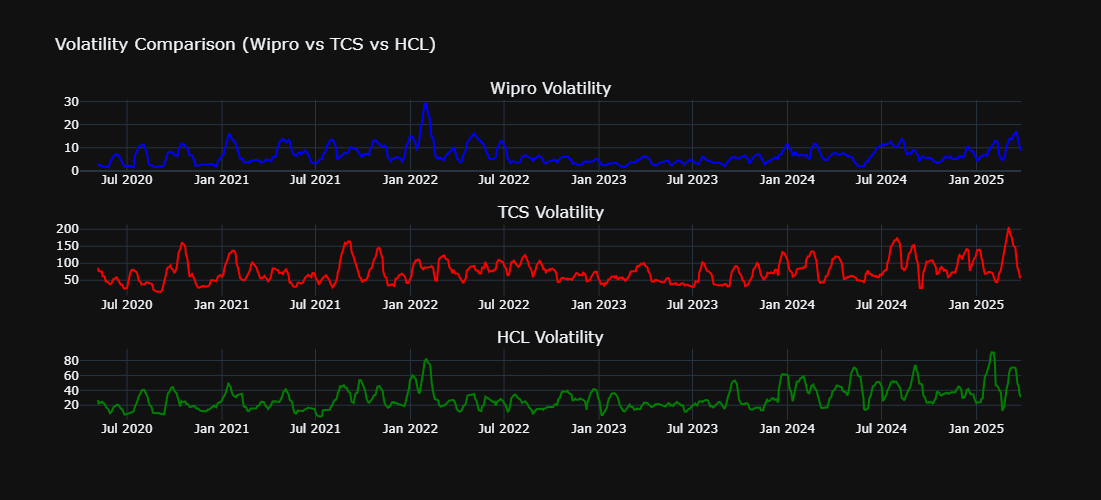

In [213]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create subplots: 1 row, 3 columns
fig = make_subplots(rows=3, cols=1, subplot_titles=("Wipro Volatility", "TCS Volatility", "HCL Volatility"))

# Wipro Volatility
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['Wipro_Volatility'], 
                         mode='lines', name="Wipro", line=dict(color='blue')), row=1, col=1)

# TCS Volatility
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['TCS_Volatility'], 
                         mode='lines', name="TCS", line=dict(color='red')), row=2, col=1)

# HCL Volatility
fig.add_trace(go.Scatter(x=combined_df.index, y=combined_df['HCL_Volatility'], 
                         mode='lines', name="HCL", line=dict(color='green')), row=3, col=1)

# Update layout
fig.update_layout(title_text="Volatility Comparison (Wipro vs TCS vs HCL)", template="plotly_dark", 
                  showlegend=False, height=500, width=1200)

fig.show()


**Volatility Comparison**

***Wipro Volatility (Blue)***

*The volatility is relatively low compared to TCS and HCL*

*There are noticeable spikes around early 2022, which might be due to market events affecting Wipro’s stock*

*Overall, it remains within a limited range, indicating relatively stable price movements over time*



**TCS Volatility (Red):**

*TCS has the highest volatility among the three stocks*

*Significant fluctuations occur throughout the period, especially around early 2022 and late 2023*

*The high peaks suggest sharp price movements, possibly due to earnings reports, economic factors, or global IT industry trends*



**HCL Volatility (Green):**

*HCL’s volatility lies between Wipro and TCS.*

*There are periodic spikes, but they are not as extreme as TCS.*

*The stock experiences some periods of higher fluctuations, particularly in mid-2022 and early 2025*

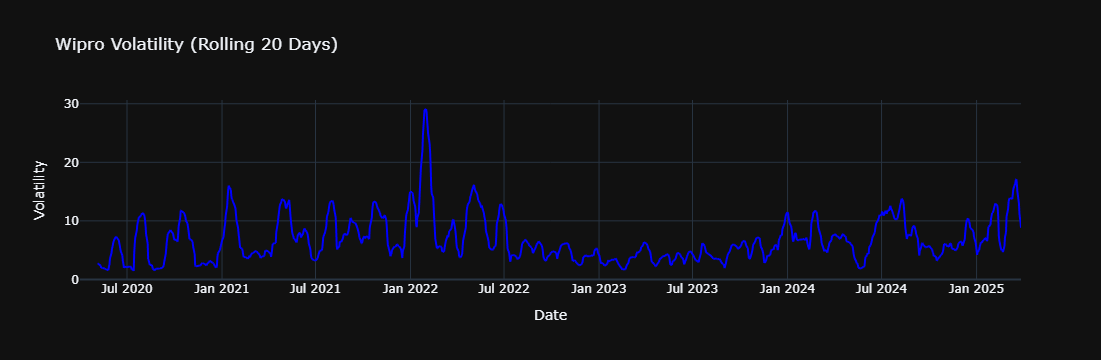

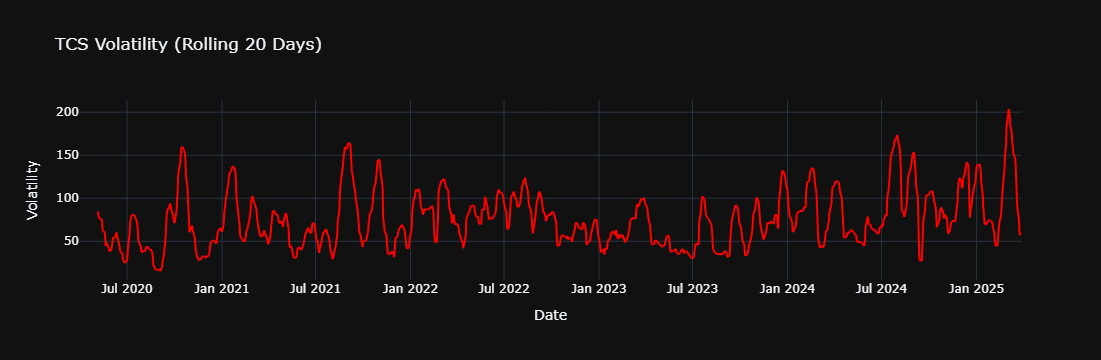

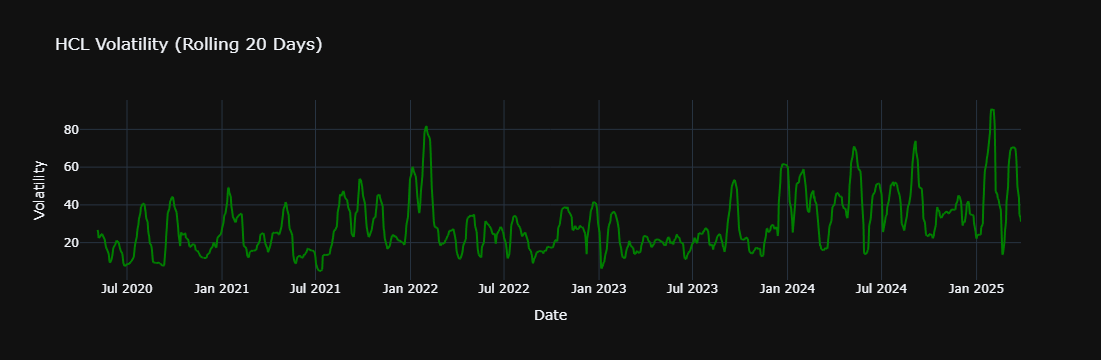

In [217]:
import plotly.express as px

# Wipro Volatility Chart (Blue)
fig_wipro = px.line(combined_df, x=combined_df.index, y='Wipro_Volatility', 
                    title='Wipro Volatility (Rolling 20 Days)', 
                    labels={'Wipro_Volatility': 'Volatility', 'index': 'Date'},
                    template='plotly_dark')
fig_wipro.update_traces(line=dict(color='blue'))  # Set color
fig_wipro.show()

# TCS Volatility Chart (Red)
fig_tcs = px.line(combined_df, x=combined_df.index, y='TCS_Volatility', 
                  title='TCS Volatility (Rolling 20 Days)', 
                  labels={'TCS_Volatility': 'Volatility', 'index': 'Date'},
                  template='plotly_dark')
fig_tcs.update_traces(line=dict(color='red'))  # Set color
fig_tcs.show()

# HCL Volatility Chart (Green)
fig_hcl = px.line(combined_df, x=combined_df.index, y='HCL_Volatility', 
                  title='HCL Volatility (Rolling 20 Days)', 
                  labels={'HCL_Volatility': 'Volatility', 'index': 'Date'},
                  template='plotly_dark')
fig_hcl.update_traces(line=dict(color='green'))  # Set color
fig_hcl.show()


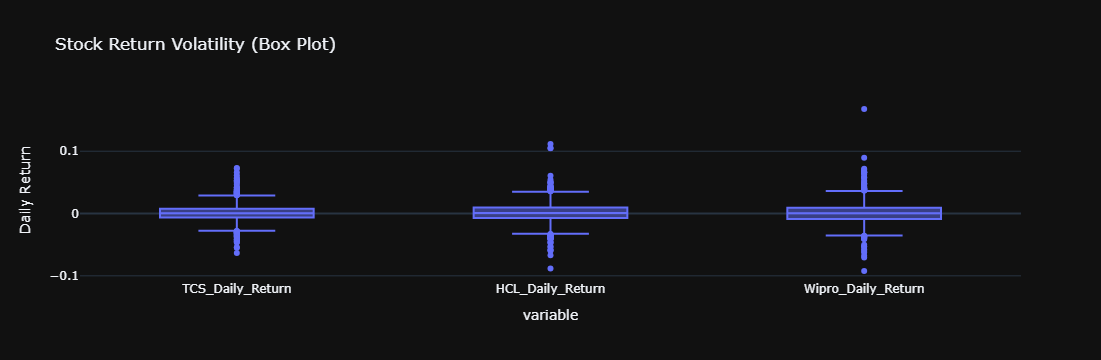

In [218]:
fig = px.box(combined_df, y=['TCS_Daily_Return', 'HCL_Daily_Return', 'Wipro_Daily_Return'], 
             title='Stock Return Volatility (Box Plot)', 
             labels={'value': 'Daily Return'},
             template='plotly_dark')

fig.show()

**Stock Return Volatility Interpretation (Box Plot)**

*The box plot shows the distribution of daily returns for TCS, HCL, and Wipro stocks*

**Median & Spread:**

*All three stocks have their medians centered around zero, indicating that their average daily return is balanced*

*HCL and TCS have a slightly tighter spread, suggesting lower volatility compared to Wipro*


**Outliers:**

*Wipro has more extreme outliers, implying occasional sharp price fluctuations.*

*TCS and HCL also show outliers but with relatively less frequency and magnitude.*


**Overall:**

*Wipro appears to be the most volatile, followed by HCL and then TCS, which has the most stable return distribution.*

In [168]:
import plotly.figure_factory as ff


# Select relevant columns
corr_matrix = combined_df[['Wipro_Daily_Return', 'TCS_Daily_Return', 'HCL_Daily_Return']].corr()

# Create the heatmap
fig = ff.create_annotated_heatmap(
    z=np.round(corr_matrix.values, 2),  # Round values for clarity
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    colorscale='blues',
    showscale=True
)

# Set title
fig.update_layout(title_text="Correlation Heatmap of Daily Returns", template="plotly_dark")

fig.show()


**Correlation Heatmap of Daily Returns - Wipro, TCS, HCL**

**Key Insights:**

**Wipro vs. TCS → Correlation: 0.58**

*Moderate positive correlation, indicating that their daily returns tend to move in the same direction, but not strongly.*



**Wipro vs. HCL → Correlation: 0.58**

*Similar correlation strength as TCS, meaning Wipro and HCL exhibit some degree of movement together, though not highly synchronized*



**TCS vs. HCL → Correlation: 0.62**

*Stronger correlation compared to Wipro, implying that TCS and HCL share more similar market reactions.*

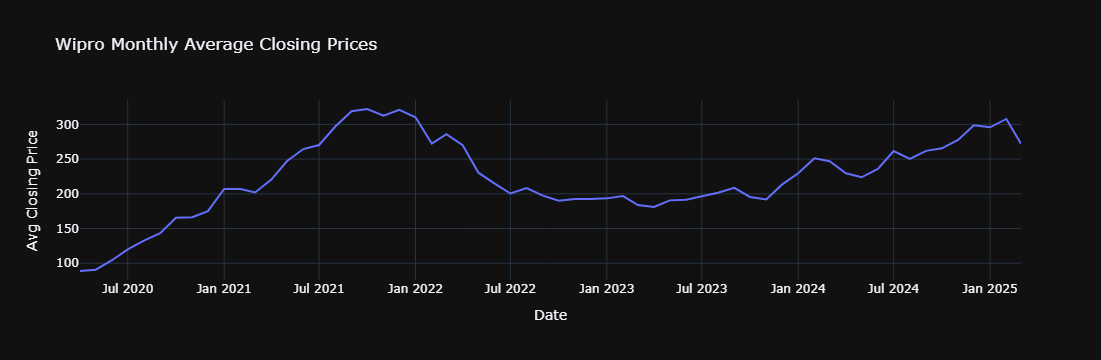

In [228]:

# Extract month and year from the index
combined_df['Month'] = combined_df.index.month
combined_df['Year'] = combined_df.index.year

# Calculate Monthly Average Closing Price
monthly_avg_price = combined_df.groupby(['Year', 'Month'])['Wipro_Close'].mean().reset_index()

# Convert to datetime format for plotting
monthly_avg_price['Date'] = pd.to_datetime(monthly_avg_price[['Year', 'Month']].assign(day=1))

# Line chart for Monthly Trends
fig = px.line(monthly_avg_price, x='Date', y='Wipro_Close', 
              title='Wipro Monthly Average Closing Prices',
              labels={'Wipro_Close': 'Avg Closing Price', 'Date': 'Date'},
              template='plotly_dark')

fig.show()

**Wipro Monthly Average Closing Prices Analysis**

**Trend Overview:**

*The average closing price of Wipro has seen significant growth from July 2020 to early 2022, peaking above 300.

A downtrend followed in 2022, stabilizing in 2023, with prices hovering around 200-250.

A renewed upward movement started in 2024, reaching similar highs to early 2022*

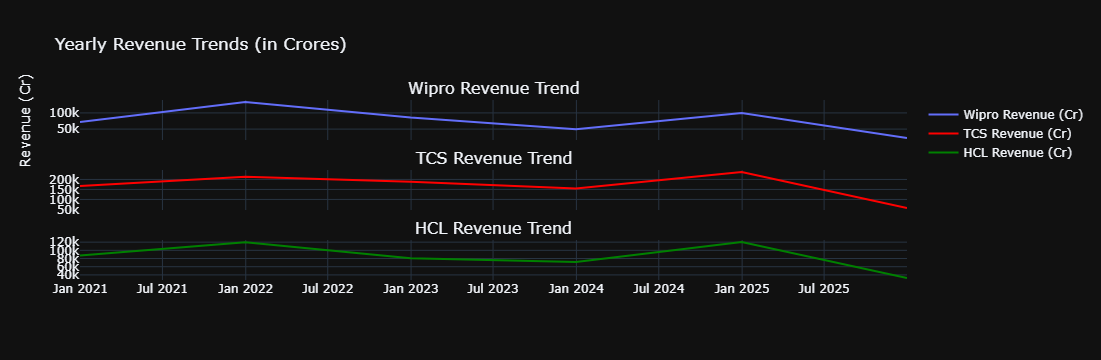

In [172]:
# Resample data to yearly frequency (assuming DateTime index)
yearly_df = combined_df.resample('YE').sum() / 10**7  # Convert revenue to crores (assuming original in INR)

# Create subplots
fig = make_subplots(rows=3, cols=1, subplot_titles=["Wipro Revenue Trend", "TCS Revenue Trend", "HCL Revenue Trend"],
                    shared_xaxes=True)

# Add Wipro revenue trend
fig.add_trace(go.Scatter(x=yearly_df.index, y=yearly_df['Wipro_Revenue'], mode='lines', name='Wipro Revenue (Cr)'), row=1, col=1)

# Add TCS revenue trend
fig.add_trace(go.Scatter(x=yearly_df.index, y=yearly_df['tcs_Revenue'], mode='lines', name='TCS Revenue (Cr)', line=dict(color='red')), row=2, col=1)

# Add HCL revenue trend
fig.add_trace(go.Scatter(x=yearly_df.index, y=yearly_df['hcl_Revenue'], mode='lines', name='HCL Revenue (Cr)', line=dict(color='green')), row=3, col=1)

# Update layout
fig.update_layout(title_text="Yearly Revenue Trends (in Crores)", template='plotly_dark', height=800, yaxis_title="Revenue (Cr)")

# Show figure
fig.show()

**Interpretation of Revenue Trends**

*The graph displays the yearly revenue trends for Wipro, TCS, and HCL, showing how their earnings have fluctuated over time.*

**Wipro Revenue Trend (Blue Line)**

*The revenue shows a rise initially, peaking in the middle period, followed by a gradual decline.

The fluctuations suggest Wipro experiences cyclical revenue changes, possibly due to seasonal demand or economic factors.

The sharp drop towards the end could indicate business challenges or market slowdowns.*


**TCS Revenue Trend (Red Line)**

*TCS starts at a relatively high revenue level compared to Wipro and HCL.

The trend follows a gradual rise to a peak, then declines significantly toward the end.

The sharp drop in later years may indicate a market downturn, reduced client spending, or increased competition.*


**HCL Revenue Trend (Green Line)**

*HCL's revenue follows an increasing trend initially, reaching a peak, and then declining.

It has a more volatile pattern but generally follows a similar cycle as the other companies.

The decline in later periods suggests a possible revenue contraction due to external market conditions*